**С целью анализа взаимного влияния зарплаты и текучести рабочей силы на пяти однотипных фирмах с одинаковым числом работников проведены измерения уровня месячной зарплаты Х и числа уволившихся за год рабочих Y:**

**X 100 150 200 250 300**

**Y 60 35 20 20 15**

**Найти линейную регрессию Y на X, выборочный коэффициент корреляции.**

In [14]:
import numpy as np
x = np.array([100,150,200,250,300], dtype=np.float64)
y = np.array([60,35,20,20,15], dtype=np.float64)
n = len(x)

Для нахождения коэффициентов регрессии $a$ и $b$ воспользуемся приведенными выше формулами:

In [5]:
b = (np.mean(x * y) - np.mean(x) * np.mean(y)) / (np.mean(x**2) - np.mean(x) ** 2)
b

-0.21

In [6]:
a = np.mean(y) - b * np.mean(x)
a

72.0

Итак, уравнение регрессии имеет вид:

$$y = 72 - 0.21 \cdot x$$

С увеличением уровня зарплаты число уволившихся рабочих снижается.

Найдем выборочный коэффициент корреляции $r$ с помощью коэффициента $b$ и средних квадратического отклонения, посчитанного для массивов $x$ и $y$:

In [10]:
r = b * np.std(x) / np.std(y)
r

-0.9036961141150639

Высокий отрицательный коэффициент показывает сильную статистическую связь.

Найдем коэффициент детерминации $R^2$:

In [11]:
R2 = r**2
R2

0.8166666666666665

Это означает, что 67.5% вариации цены на квартиру ($y$) объясняется вариацией фактора $x$ — площади квартиры.

С помощью этого уравнения регрессии посчитаем значения, предсказанные моделью значения цен на квартиры:

In [16]:
y_pred = a + b * x
y_pred

array([51. , 40.5, 30. , 19.5,  9. ])

Качество модели найдем с помощью средней ошибки аппроксимации $\overline {A}$:

In [17]:
A_mean = 100 * np.mean(np.abs((y - y_pred) / y))
A_mean

24.642857142857146

Так как $\overline {A}$ равна 24%, что  превышает 8-10 %, модель плохо описывает эмпирические данные. Для оценки значимости 

уравнения регрессии воспользуемся F-критерием Фишера. Найдем фактическое значение $F$-критерия ($F_{факт}$):

In [19]:
F_fact = (r**2 * (n - 2)) / (1 - r**2)
F_fact

13.363636363636353

При 5 % уровне значимости и степенях свободы $k_1 = 1$ и $k_2 = 5 - 2 = 2$ табличное значение критерия: $F_{кр} = 10.13$.

Так как $F_{факт} = 13.36 > F_{кр} = 10.13$, уравнение регрессии статистически значимо.

Для оценки статистической значимости параметров регрессии воспользуемся $t$-статистикой Стьюдента и также рассчитаем 

доверительные интервалы каждого из показателей. При $df = n - 2 = 5 - 2 = 3$ и $\alpha = 0.05$ получим

(см. <a href='https://statpsy.ru/t-student/t-test-tablica/'>Таблицу критических значений t-критерия Стьюдента</a>):

$$t_{кр} = 3.182$$

Определим стандартную ошибку $S_{ост}$ (переменная **s_residual**) и случайные ошибки $m_a, \; m_b$:

In [23]:
s_residual = np.sqrt(np.sum((y - y_pred)**2) / (n - 2))
m_a = s_residual * np.sqrt(np.sum(x ** 2)) / (n * np.std(x))
m_b = s_residual / (np.std(x) * np.sqrt(n))

print('s_residual = {}\nm_a = {}\nm_b = {}'.format(s_residual, m_a, m_b))

s_residual = 9.082951062292475
m_a = 12.186057606953941
m_b = 0.05744562646538028


Вычислим наблюдаемые значения критерия $t_a$ и $t_b$:

In [24]:
t_a = a / m_a
t_a

5.908391567007971

In [25]:
t_b = b / m_b
t_b

-3.6556307750696546

Фактические значения t-статистики больше табличного значения:

$$t_a = 5.91 > t_{кр} = 3.182, \; t_b = |-3.65| > t_{кр} = 3.182,$$

поэтому параметры $a$ и $b$ не случайно отличаются от нуля, то есть они статистически значимы.

Рассчитаем доверительные интервалы для параметров регрессии $a$ и $b$. Для этого определим предельную ошибку для каждого показателя ($\Delta_a$ и $\Delta_b$),

используя значение $t_{кр}$, равное 3.182 (переменная **t_cr**):

In [38]:
t_cr = 3.182

In [39]:
delta_a = t_cr * m_a
delta_a

38.77603530532744

In [40]:
delta_b = t_cr * m_b
delta_b

0.18279198341284006

Найдем границы доверительных интервалов $\gamma_{a_{min}}, \gamma_{a_{max}}, \gamma_{b_{min}}, \gamma_{b_{max}}$:

In [41]:
gamma_a_min = a - delta_a
gamma_a_min

33.22396469467256

In [42]:
gamma_a_max = a + delta_a
gamma_a_max

110.77603530532744

In [43]:
gamma_b_min = b - delta_b
gamma_b_min

-0.39279198341284005

In [44]:
gamma_b_max = b + delta_b
gamma_b_max

-0.027208016587159933

Приходим к выводу о том, что с вероятностью $p = 1 - \alpha = 0.95$ параметры $a$ и $b$, находясь в указанных границах, 

являются статистически значимыми и отличны от нуля. Поместим исходные и предсказанные данные в датафрейм **df**:

In [34]:
import pandas as pd

df = pd.DataFrame({'x': x, 'y': y, 'y_pred': y_pred}, columns=['x', 'y', 'y_pred'])
df

,x,y,y_pred
0,100.0,60.0,51.0
1,150.0,35.0,40.5
2,200.0,20.0,30.0
3,250.0,20.0,19.5
4,300.0,15.0,9.0


Отсортируем значения по полю **x**:

In [35]:
df = df.sort_values('x')
df

,x,y,y_pred
0,100.0,60.0,51.0
1,150.0,35.0,40.5
2,200.0,20.0,30.0
3,250.0,20.0,19.5
4,300.0,15.0,9.0


Построим на одном графике исходные данные и теоретическую прямую, построенную по уравнению регрессии:

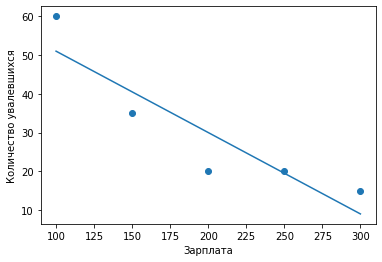

In [45]:
import matplotlib.pyplot as plt

plt.scatter(df['x'], df['y'])
plt.plot(df['x'], df['y_pred'])
plt.xlabel('Зарплата')
plt.ylabel('Количество увалевшихся')
plt.show()